# **Важно!**

Домашнее задание состоит из нескольких задач, которые вам нужно решить.
*   Баллы выставляются по принципу выполнено/невыполнено.
*   За каждую выполненую задачу вы получаете баллы (количество баллов за задание указано в скобках).

**Инструкция выполнения:** Выполните задания в этом же ноутбуке (места под решения **КАЖДОЙ** задачи обозначены как **#НАЧАЛО ВАШЕГО РЕШЕНИЯ** и **#КОНЕЦ ВАШЕГО РЕШЕНИЯ**)

**Как отправить задание на проверку:** Вам необходимо сохранить ваше решение в данном блокноте и отправить итоговый **файл .IPYNB** на учебной платформе в **стандартную форму сдачи домашнего задания.**

**Срок проверки преподавателем:** домашнее задание проверяется **в течение 3 дней после дедлайна сдачи** с предоставлением обратной связи.

# **Прежде чем проверять задания:**

1. Перезапустите **ядро (restart the kernel)**: в меню, выбрать **Ядро (Kernel)**
→ **Перезапустить (Restart)**.
2. Затем **Выполнить** **все ячейки (run all cells)**: в меню, выбрать **Ячейка (Cell)**
→ **Запустить все (Run All)**.

После ячеек с заданием следуют ячейки с проверкой **с помощью assert.**

Если в коде есть ошибки, assert выведет уведомление об ошибке.

Если в коде нет ошибок, assert отработает без вывода дополнительной информации.

---

In [1]:
# Запустите эту ячейку для первоначальной настройки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rc('lines', linewidth=2)

# Домашнее задание 6. Выдача моделей в продакшен

**Цели домашнего задания:** собрать воедино и применить на практике изученный в этом модуле материал.

# Условия домашней работы

В этом задании вам предстоит пройти все основные этапы выдачи модели в продакшен.

**Задание 1 (1 балл)**

Сгенерируйте синтетический набор данных с помощью [`sklearn.datasets.make_classification`](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.make_classification.html) размером в 1000 примеров. Задайте число признаков равным 10: 7 информативных, 3 избыточных и 2 повторяющихся признака (переменные `n_informative`, 'n_redundant', 'n_repeated'). Задайте `random_state=0`.

In [2]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=3,
    n_repeated=2,
    random_state=0
)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

**Задание 2 (1 балл)**

Проанализируйте корреляцию между признаками и целевой переменной. Постройте корреляционную матрицу, идентифицируйте с ее помощью неинформативные и повторяющиеся признаки. Запишите оставшиеся индексы списком в переменную `informative_features`. Отберите только информативные признаки в массив `X_selected`.

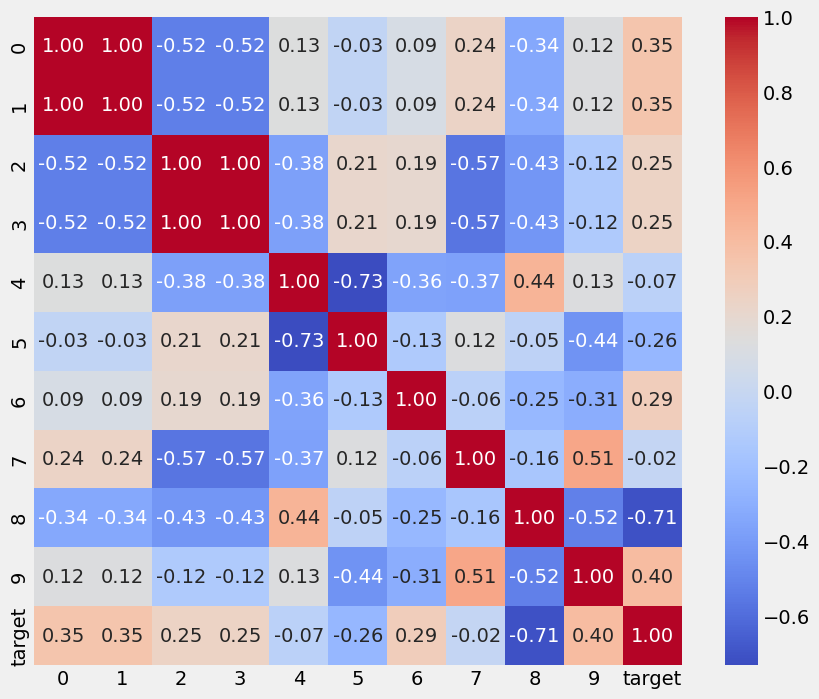

Индексы информативных признаков: [8, 9, 0, 1, 6]


In [3]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
df = pd.DataFrame(X, columns=[f'{i}' for i in range(X.shape[1])])
df['target'] = y

# Вычисляем корреляционную матрицу
corr_matrix = df.corr()

# Визуализация heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.show()

# Определяем информативные признаки
target_corr = corr_matrix['target'].abs().sort_values(ascending=False)
informative_indices = target_corr[1:6].index
informative_features = [int(name) for name in informative_indices]
print("Индексы информативных признаков:", informative_features)

X_selected = X[:, informative_features]
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [4]:
assert len(informative_features) == 5

**Задание 3 (1 балл)**

Разделите данные на обучающую и тестовую выборки в пропорции 80/20. Задайте `random_state=0`.

In [5]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=0
)

# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [6]:
assert X_train.shape == (800, 5)
assert X_test.shape == (200, 5)
assert y_train.shape == (800,)
assert y_test.shape == (200,)

**Задание 4 (1 балл)**

Воспользуйтесь [PCA](https://scikit-learn.org/1.5/modules/generated/sklearn.decomposition.PCA.html) для выделения двух главных признаков. Для обучения воспользуйтесь только выборкой `X_train`; затем, пользуясь готовой моделью, трансформируйте данные `X_train` и `X_test`. Это предотвращает утечку информации между сетами. Сохраните преобразованные данные в переменные `X_train_pca` и `X_test_pca`.

In [7]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# КОНЕЦ ВАШЕГО РЕШЕНИЯ

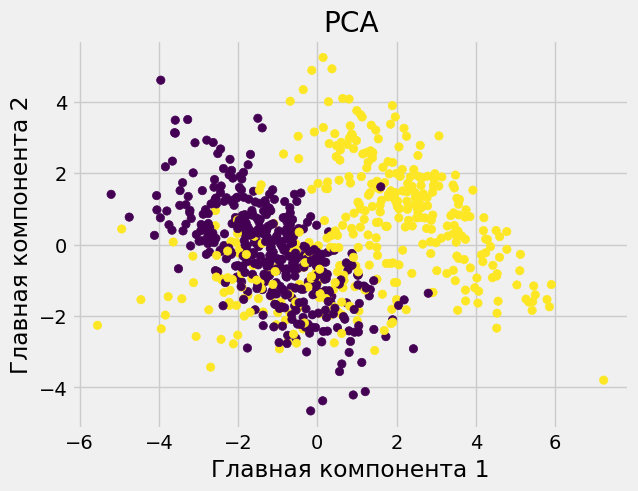

In [8]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title("PCA")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()

**Задание 5 (1 балл)**

Обучите модель градиентного бустинга XGBoost на обучающей выборке и оцените ее точность на тестовой выборке с помощью метрики `accuracy_score`.

In [9]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(random_state=0)
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [10]:
print(accuracy)
assert accuracy > 0.8

0.81


**Задание 6 (1 балл)**

Сохраните модель в формате pickle.

In [11]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
import pickle

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# КОНЕЦ ВАШЕГО РЕШЕНИЯ

В следующем задании от вас потребуется оценить дрейф данных. Давайте сымитируем смещение данных, слегка изменив один из признаков в тестовой выборке.

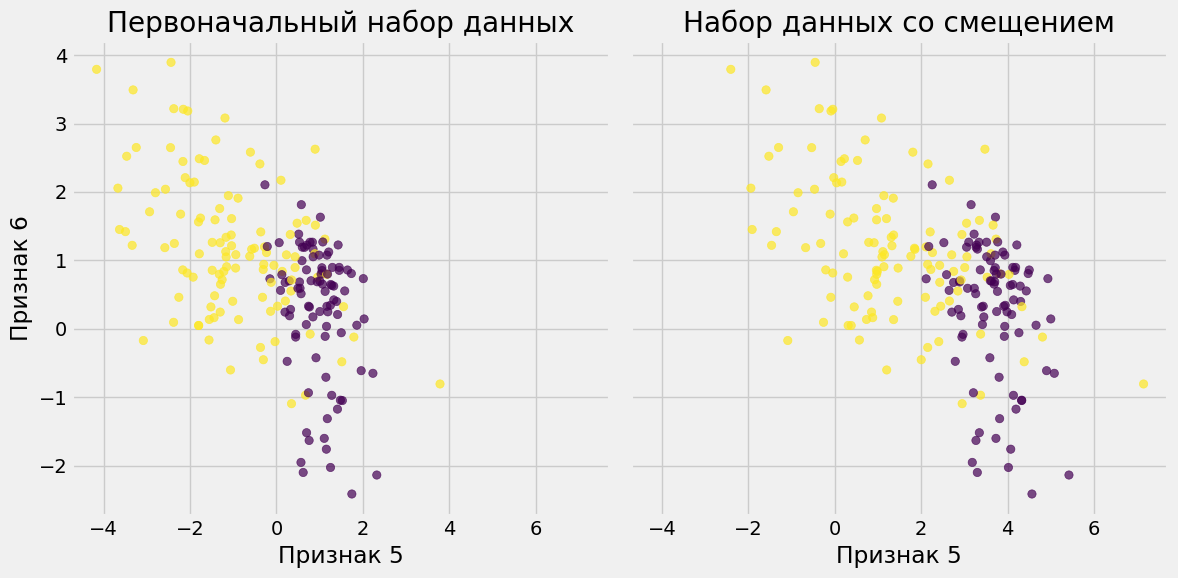

In [27]:
X_drifted = X_test.copy()
# Смещаем один из признаков
X_drifted[:, 0] = 0.5 + X_drifted[:, 0] * 1.2 + np.random.normal(loc=2, scale=0.1, size=(len(X_drifted,)))

# Visualize original and drifted datasets
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Plot original dataset
axs[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="viridis", alpha=0.7)
axs[0].set_title("Первоначальный набор данных")
axs[0].set_xlabel("Признак 5")
axs[0].set_ylabel("Признак 6")

# Plot drifted dataset
axs[1].scatter(X_drifted[:, 0], X_drifted[:, 1], c=y_test, cmap="viridis", alpha=0.7)
axs[1].set_title("Набор данных со смещением")
axs[1].set_xlabel("Признак 5")

plt.tight_layout()
plt.show()

**Задание 7 (1 балл)**

Обработайте смещенный сет таким же образом, как и тренировочный. Оцените Accuracy на смещенных данных, запишите результат в переменную `accuracy_drifted`.

**Внимание!** Не нужно обучать новую модель `pca`. Чтобы применить ту же модель, воспользуйтесь методом `transform`.

In [28]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
with open('xgb_model.pkl', 'rb') as file:
     model = pickle.load(file)

y_drifted = y_test.copy()

X_drifted_pca = pca.transform(X_drifted)
y_drifted_pred = model.predict(X_drifted_pca)

accuracy_drifted = accuracy_score(y_drifted, y_drifted_pred)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [29]:
print(accuracy_drifted)
assert accuracy_drifted < accuracy
assert accuracy_drifted > 0.7

0.705


Обратите внимание, что точность предсказания упала.

Оценим, как наши изменения влияют на значение KL-дивергенции. Мы написали функцию, рассчитывающую значение KL-дивергенции. Чтобы получить плотности вероятностей, переводим данные в гистограммы.

In [30]:
from scipy.stats import entropy

def kl_div(X, X_drifted, feat):
    # Рассчитываем плотности вероятностей
    hist_original, bin_edges = np.histogram(X[:, feat], bins=80, density=True)
    hist_drifted, _ = np.histogram(X_drifted[:, feat], bins=bin_edges, density=True)

    # Избегаем нулей
    hist_original += 1e-10
    hist_drifted += 1e-10

    # Возвращаем энтропию между плотностями вероятностей
    return entropy(hist_original, hist_drifted)

**Задание 8 (1 балл)**


Воспользуйтесь функцией `kl_div` для каждого признака для рассчета дивергенции для каждого из признаков. Запишите результаты в переменные kl_feat_i, где i пробегает значения от 0 до 4 включительно.

In [31]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
kl_feat_0 = kl_div(X_test, X_drifted, 0)
kl_feat_1 = kl_div(X_test, X_drifted, 1)
kl_feat_2 = kl_div(X_test, X_drifted, 2)
kl_feat_3 = kl_div(X_test, X_drifted, 3)
kl_feat_4 = kl_div(X_test, X_drifted, 4)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [32]:
assert kl_feat_1 == kl_feat_2 == kl_feat_3 == kl_feat_4 == 0
assert kl_feat_0 > 5

**Задание 9 (1 балл)**

Создайте Docker-файл для деплоя вашей модели. Сохраните файл с именем `Dockerfile`. Файл должен содержать информацию об образе Python (`FROM`), название `WORKDIR`, и скопировать в контейнер модель, Python-файл запускающий модель `app.py`, а также файл с пререквизитами (`model.pkl` и `requirements.txt`). Он также должен открывать порт (`EXPOSE`) и запускать скрипт, содержащий модель `app.py`.

**Внимание!** От вас не требуется создание файлов requirements.txt и app.py.

In [ ]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
# Используем базовый образ Python
FROM python:3.9

# Копируем локальные файлы в контейнер
WORKDIR /model
COPY app.py /model/app.py
COPY model.pkl /model/model.pkl
COPY requirements.txt /model/requirements.txt

# Устанавливаем зависимости
RUN pip install --no-cache-dir -r /model/requirements.txt

# Устанавливаем рабочий порт и команду запуска
EXPOSE 5000
CMD ["python", "app.py"]
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

**Задание 10 (1 балл)**

Создайте репозиторий на GitHub и загрузите в него ваши файлы, включая обученную модель, Docker-файл и инструкции по запуску. Вставьте в окошечко ниже ссылку на репозиторий.

In [ ]:
# ССЫЛКА НА GITHUB

## Поздравляем!

Вы прошли все этапы: с подготовки данных до деплоя модели, произвели извлечение признаков, оценили дрейф данных и создали `dockerfile` и `github` репозиторий.